In [1]:
import os
import shutil

# Set up the Kaggle API credentials
kaggle_path = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_path, exist_ok=True)
shutil.copy("kaggle.json", os.path.join(kaggle_path, "kaggle.json"))



'C:\\Users\\Mridul/.kaggle\\kaggle.json'

importing the dogvscat dataset from kaggle 

!kaggle competitions download -c dogs-vs-cats

#extracting the compressed dataset 
from zipfile import ZipFile 
dataset = 'dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip: 
    zip.extractall()
    print('dataset is extracted')

#extracting the compressed dataset 
from zipfile import ZipFile 
dataset = 'train.zip'
with ZipFile(dataset,'r') as zip: 
    zip.extractall()
    print('dataset is extracted')

In [3]:
import os 
#counting the number of files in train folder 
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('no of images = ',file_count)

no of images =  25000


Printing the name of images 

In [5]:
file_names = os.listdir('train')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

Importing the dependencies 

In [6]:
import numpy as np 
from PIL import Image 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
from sklearn.model_selection import train_test_split 
import cv2 

Displaying the images of dog and cats 

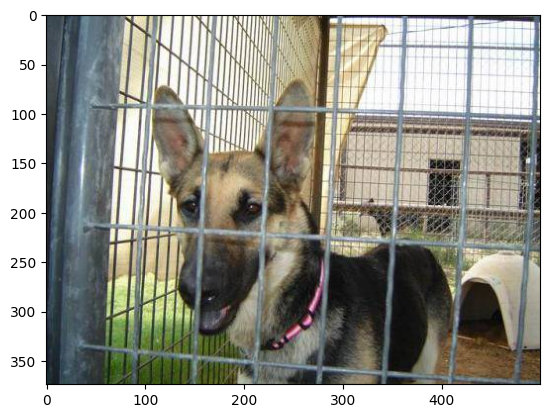

In [9]:
#display dog image 
img = mpimg.imread('train/dog.11847.jpg')
imgplt = plt.imshow(img)


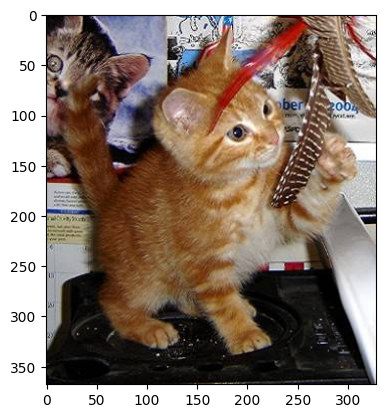

In [10]:
#display cat image 
img = mpimg.imread('train/cat.1008.jpg')
imgplt = plt.imshow(img)


#Resizing all the images 

In [13]:
file_names = os.listdir('train') 
for i in range(5): 
    name = file_names[i]
    print(name[0:3])

cat
cat
cat
cat
cat


In [24]:
file_names = os.listdir('train') 
dog_count = 0 
cat_count = 0
for img in file_names: 
    name = img[0:3]
    if name == 'dog': 
        dog_count+=1 
    else: 
        cat_count+=1 

print(dog_count)
print(cat_count)

12500
12500


Resizing all the images 

In [31]:
#creatubg a durectory for resized images 
os.mkdir('image_resized')
original_folder = 'train/'
resized_folder = 'image_resized/'

for i in range(25000): 
    filename = os.listdir(original_folder)[i]
    img_path = original_folder+filename

    img = Image.open(img_path)
    img = img.resize((224,224))
    img = img.convert('RGB')

    newImgPath = resized_folder+filename 
    img.save(newImgPath)

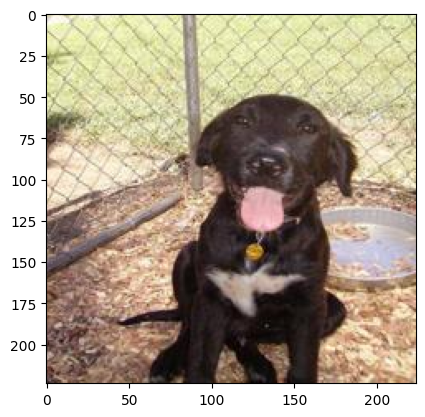

In [32]:
#display resized dog image 
img = mpimg.imread('image_resized/dog.8292.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for images of dogs and cats 
cat - 0 
dog - 1 

In [35]:
#Creating  a for loop to assign labels 
filenames = os.listdir('image_resized/')

labels = [] 
for i in range(25000): 
    file_name = filenames[i] 
    label = file_name[0:3]

    if label == 'cat': 
        labels.append(0)
    else: 
        labels.append(1) 

In [40]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
25000


In [41]:
#counting the images of dogs and cats out of 25000 images 
values, counts = np.unique(labels,return_counts=True) 
print(values)
print(counts)

[0 1]
[12500 12500]


In [42]:
#Converting all the resized images to numpy arrays 
import cv2 
import glob

In [43]:
image_directory = 'image_resized/'
image_extension = ['png','jpg'] 

files = [] 
[files.extend(glob.glob(image_directory + '*.'+e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [44]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [122 200 246]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [123 201 247]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 204 245]
   [123 202 245]
   [123 202 245]]

  ...

  [[ 55 123 160]
   [ 55 123 160]
   [ 56 124 161]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 53 121 158]
   [ 54 122 159]
   [ 55 123 160]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 52 120 157]
   [ 52 120 157]
   [ 53 121 158]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [185 205 210]
   [173 197 203]
   [164 192 199]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [180 200 205]
   [169 195 201]
   [167 195 202]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [172 192 197]
   [167 193 200]
   [171 198

In [45]:
type(dog_cat_images)

numpy.ndarray

In [46]:
print(dog_cat_images.shape)

(25000, 224, 224, 3)


In [47]:
x = dog_cat_images
y = np.asarray(labels)

train test split 

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2) 

In [49]:
print(x.shape,x_train.shape,x_test.shape)

(25000, 224, 224, 3) (20000, 224, 224, 3) (5000, 224, 224, 3)


In [52]:
#scaling the data 
x_train_scaled = x_train/255
x_test_scales = x_test/255


MemoryError: Unable to allocate 5.61 GiB for an array with shape (5000, 224, 224, 3) and data type float64